 # Online Retail

## Descripción general

Este es un conjunto de datos transaccionales que contiene todas las transacciones ocurridas entre el 01/12/2009 y 09/12/2011 para una tienda en línea registrada en el Reino Unido. La empresa se dedica principalmente a la venta de regalos únicos para toda ocasión. Muchos de los clientes de la empresa son mayoristas.

## Carga de los datos

Librerias necesarias

In [16]:
#%pip install seaborn
#%pip install geopandas

In [ ]:
import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import os

In [6]:
rutaArchivo = "https://raw.githubusercontent.com/RodrigoStranger/online-retail/main/dataset/online_retail_II.csv"

Cargamos los datos en un Dataframe

In [7]:
onlineRetail = pd.read_csv(rutaArchivo, encoding='ISO-8859-1')

Renombrar las columnas

In [8]:
onlineRetail = onlineRetail.rename(columns={"Invoice": "InvoiceNo", "Customer ID": "CustomerID", "Price": "UnitPrice"})

## Primera exploración de los datos

### ¿Cuantos datos hay?

In [9]:
print(f"El DataFrame onlineRetail tiene {len(onlineRetail)} filas.")

El DataFrame onlineRetail tiene 1067371 filas.


### ¿Qué columnas existen y qué representan?

In [10]:
onlineRetail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### Metadata

Podemos identificar que:
- InvoiceNo (Nominal, Discreto): Un número entero de 6 dígitos asignado de forma única a cada transacción. Si este código empieza con la letra «c», indica una cancelación.
- StockCode (Nominal): Un número entero de 5 dígitos asignado de forma única a cada producto distinto	.
- Description (Nominal): Nombre del producto.
- Quantity (Numérico, Discreto): Las cantidades de cada producto (**artículo**) por transacción.
- InvoiceDate (Numérico): El día y la hora en que se generó cada transacción, va desde la fecha **01/12/2009**, hasta la fecha **09/12/2011**.
- UnitPrice (Numérico, Continuo): Precio unitario del producto, **libra esterlina**.
- CustomerID (Nominal, Discreto): Un número integral de 5 dígitos asignado de forma única a cada cliente.
- Country (Nominal): El nombre del país donde reside cada cliente.

### ¿Qué tipo de datos contiene cada columna?

In [11]:
onlineRetail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Podemos identificar que:
- InvoiceNo: object (Texto o cadena)
- StockCode: object (Texto o cadena)
- Description: object (Texto o cadena)
- Quantity: int64 (Número entero)
- InvoiceDate: object (Fecha y hora)
- UnitPrice: float64 (Número de punto flotante)
- CustomerID: float64 (Número de punto flotante)
- Country: object (Texto o cadena)

## Identificar problemas en los datos

¿Hay valores duplicados, faltantes o datos inconsistentes?

### Eliminación de valores duplicados

In [12]:
def mapaDuplicadosTodas(df, sample_size=200):
    duplicados = df[df.duplicated(keep=False)]
    if duplicados.empty:
        print("No hay duplicados en el DataFrame.")
        return
    if len(duplicados) > sample_size:
        duplicados = duplicados.sample(sample_size, random_state=42)
    mask = duplicados.apply(lambda col: col.duplicated(keep=False))

    plt.figure(figsize=(12,6))
    sns.heatmap(mask, cmap="Reds", cbar=False, linewidths=0.5)
    plt.title("Mapa de duplicados")
    plt.xlabel("Columnas")
    plt.ylabel("Filas duplicadas")
    plt.show()

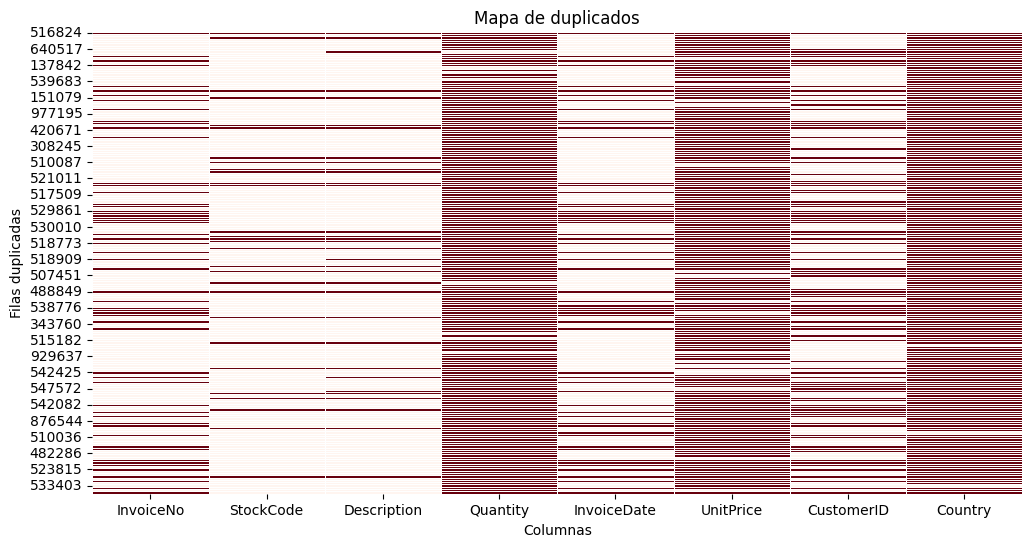

In [13]:
mapaDuplicadosTodas(onlineRetail)

Eliminamos valores duplicados en el DataFrame:

In [14]:
def mostrarDuplicados(df):
    numDuplicados = df.duplicated().sum()
    print(f"Cantidad de filas duplicadas: {numDuplicados}")

Obtenemos el número de duplicados

In [15]:
mostrarDuplicados(onlineRetail)

Cantidad de filas duplicadas: 34335


Eliminamos los duplicados

In [17]:
onlineRetail.drop_duplicates(inplace=True)

Verificamos:

In [18]:
mostrarDuplicados(onlineRetail)

Cantidad de filas duplicadas: 0


In [19]:
mapaDuplicadosTodas(onlineRetail)

No hay duplicados en el DataFrame.


### Valores faltantes

Podemos identificar si existen datos faltantes en todas las columnas

In [ ]:
def verificarNulos(dataFrame):
    dfNulos = dataFrame.isnull().sum()
    dfNulos = dfNulos.reset_index()
    dfNulos.columns = ['Columna', 'NumeroDeValoresNulos']
    return dfNulos

Ejecutamos:

In [ ]:
verificarNulos(onlineRetail)

,Columna,NumeroDeValoresNulos
0,InvoiceNo,0
1,StockCode,0
2,Description,4275
3,Quantity,0
4,InvoiceDate,0
5,UnitPrice,0
6,CustomerID,235151
7,Country,0


graficamos un mapa de los valores nulos (bloques)

In [ ]:
def mapaNulosTodas(df, sample_size=200):
    nulos = df[df.isnull().any(axis=1)]
    if nulos.empty:
        print("No hay valores nulos en el DataFrame.")
        return
    if len(nulos) > sample_size:
        nulos = nulos.sample(sample_size, random_state=42)
    mask = nulos.isnull()
    plt.figure(figsize=(12,6))
    sns.heatmap(mask, cmap="Blues", cbar=False, linewidths=0.5)
    plt.title("Mapa de valores nulos")
    plt.xlabel("Columnas")
    plt.ylabel("Filas con nulos")
    plt.show()

Ejecutamos:

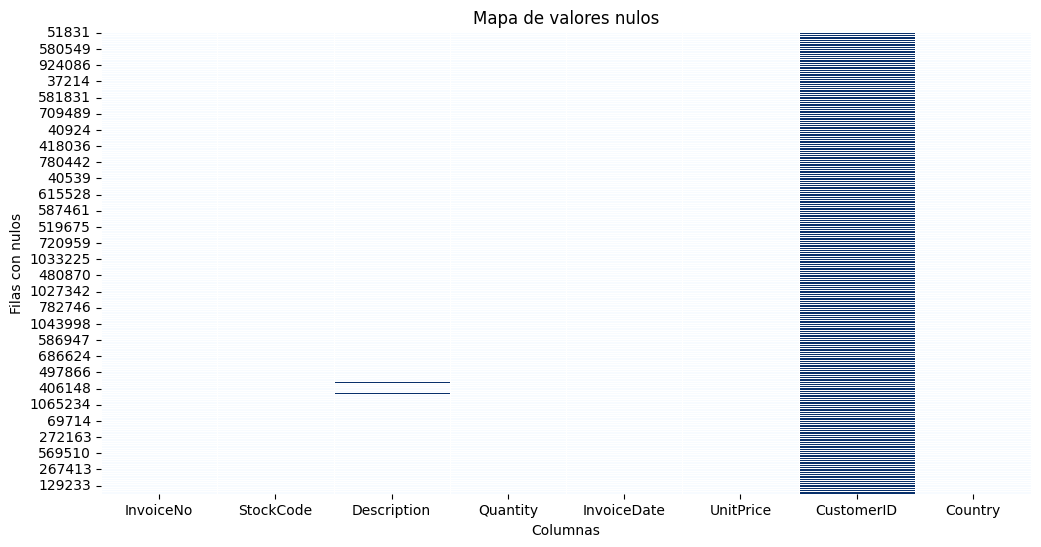

In [ ]:
mapaNulosTodas(onlineRetail)

Hacemos un pequeño escaneo:

In [ ]:
print(onlineRetail['Description'].value_counts())

Description
WHITE HANGING HEART T-LIGHT HOLDER     5740
REGENCY CAKESTAND 3 TIER               4295
JUMBO BAG RED RETROSPOT                3388
ASSORTED COLOUR BIRD ORNAMENT          2868
PARTY BUNTING                          2730
                                       ... 
?? missing                                1
check?                                    1
rusty thrown away                         1
wrongly marked                            1
SET 10 CARDS CHRISTMAS BAUBLE 16954       1
Name: count, Length: 5698, dtype: int64


#### Hipotesis de un valor faltante (CustomerID)

Observamos algo en particular, las ultimos valores de las descripciones tienen un código en particular, ¿Será el CustomerID?, ¿Será que, la fila específica de esa descripción, el CustomerID es NaN?

In [ ]:
def buscarFilaPorDescripcion(dataFrame, descripcion):
    resultado = dataFrame[dataFrame['Description'].str.contains(descripcion, case=False, na=False)]
    print(resultado)

In [ ]:
buscarFilaPorDescripcion(onlineRetail, 'SET 10 CARD CHRISTMAS STAMPS 16963')

        InvoiceNo StockCode                         Description  Quantity  \
1003534    577078     23652  SET 10 CARD CHRISTMAS STAMPS 16963         2   

                 InvoiceDate  UnitPrice  CustomerID         Country  
1003534  2011-11-17 15:17:00       2.91         NaN  United Kingdom  


Encontramos que para SET 10 CARD CHRISTMAS STAMPS 16963, su CostumerID es nulo (NaN)...

¿Podemos demostrarlo?

Generalmente pienso que, por alguna razón, el CustomerID, se concatenó con la descripción del producto, por ello, existen 132220 productos con CustomerID NaN

In [ ]:
def analizarCustomerId(dataFrame):
    customersIds = dataFrame['CustomerID'].dropna()
    lengths = customersIds.apply(lambda x: len(str(int(x))))
    promedioDigitos = lengths.mean()

    plt.figure(figsize=(10, 5))
    plt.hist(lengths, bins=range(1, int(lengths.max()) + 2), edgecolor='black')
    plt.title('Distribución de Longitudes de CustomerID')
    plt.xlabel('Número de Dígitos de CustomerID')
    plt.ylabel('Frecuencia')
    plt.xticks(range(1, int(lengths.max()) + 1))
    plt.grid(axis='y')
    plt.show()

    print(f"Promedio de dígitos en CustomerID (sin nulos): {promedioDigitos}")

def analizarNulosVsNoNulos(dataFrame):
    nulos = dataFrame['CustomerID'].isnull().sum()
    noNulos = len(dataFrame) - nulos

    plt.figure(figsize=(7, 5))
    plt.bar(['No Nulos', 'Nulos'], [noNulos, nulos], color=['blue', 'red'])
    plt.title('Cantidad de CustomerID Nulos vs No Nulos')
    plt.ylabel('Cantidad')
    plt.show()

    print(f"Cantidad de CustomerID Nulos: {nulos}")
    print(f"Cantidad de CustomerID No Nulos: {noNulos}")

Ejecutamos:

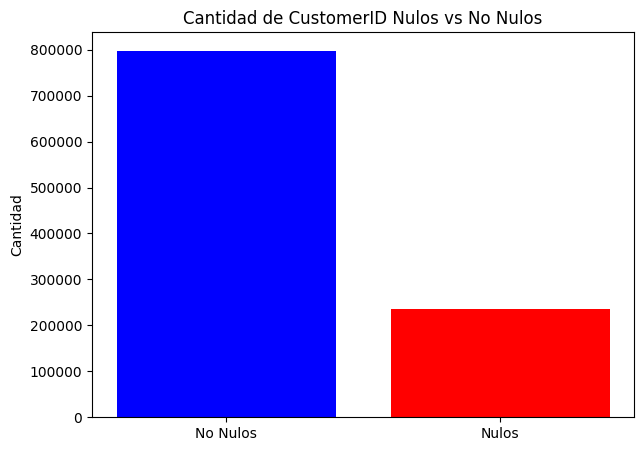

Cantidad de CustomerID Nulos: 235151
Cantidad de CustomerID No Nulos: 797885


In [ ]:
analizarNulosVsNoNulos(onlineRetail)

Ejecutamos:

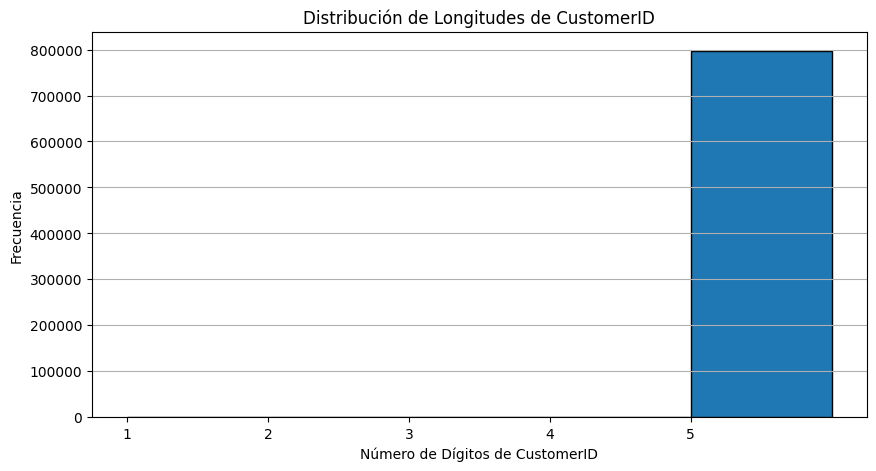

Promedio de dígitos en CustomerID (sin nulos): 5.0


In [ ]:
analizarCustomerId(onlineRetail)

In [ ]:
def compararNulosYDescripcionesCodigo5Digitos(dataFrame, columnaCustomerId, columnaDescripcion):
    nulosCustomerId = dataFrame[columnaCustomerId].isnull().sum()
    patron = r'\d{5}'  # Coincide con 5 dígitos en cualquier parte de la cadena
    descripcionesFiltradas = dataFrame[dataFrame[columnaDescripcion].str.contains(patron, na=False)][columnaDescripcion]
    cantidadDescripciones = len(descripcionesFiltradas)

    plt.figure(figsize=(8, 5))
    plt.bar(['Nulos en CustomerID', 'Descripciones con 5 dígitos'], [nulosCustomerId, cantidadDescripciones], color=['red', 'blue'])
    plt.title('Comparación entre Nulos en CustomerID y Descripciones con Código de 5 Dígitos')
    plt.ylabel('Cantidad')
    plt.show()

    print(f"Cantidad de CustomerID nulos: {nulosCustomerId}")
    print(f"Cantidad de descripciones que contienen un código de 5 dígitos: {cantidadDescripciones}")

    return descripcionesFiltradas

Para que nuestra hipotesis sea correcta, el numero de nulos de CustomerID nulos (NaN) debe ser igual a las descripciones de 5 digitos encontradas....

Ejecutamos:

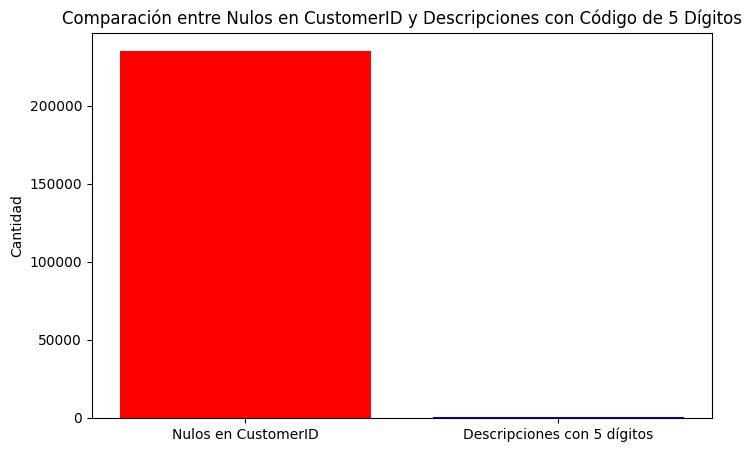

Cantidad de CustomerID nulos: 235151
Cantidad de descripciones que contienen un código de 5 dígitos: 248


In [ ]:
descripcionesCincoDigitos = compararNulosYDescripcionesCodigo5Digitos(onlineRetail, 'CustomerID', 'Description')

Ejecutamos:

In [ ]:
display(descripcionesCincoDigitos.head())

,Description
263,85123a mixed
284,21733 mixed
4538,invcd as 84879?
6911,21494
181648,invoice 506647


Oh, el número de CustomerID nulos (NaN) es diferente a la cantidad de descripciones que poseen el patron **r'\d{5}'**, por lo cual, ¿Todas las descripciones que presenten el patron **r'\d{5}'** tienen su CustomerID nulo (NaN)?

In [ ]:
def verificarNulosPorDescripcion(descripcionesCincoDigitos, dataFrame, columnaCustomerId, columnaDescripcion):
    descripcionesFiltradas = dataFrame[dataFrame[columnaDescripcion].isin(descripcionesCincoDigitos)].copy()
    descripcionesConCustomerIdNoNulo = descripcionesFiltradas[descripcionesFiltradas[columnaCustomerId].notnull()]
    descripcionesConCustomerIdNulo = descripcionesFiltradas[descripcionesFiltradas[columnaCustomerId].isnull()]
    print(f"Cantidad de descripciones con 5 dígitos y CustomerID no nulo: {len(descripcionesConCustomerIdNoNulo)}")
    print(f"Cantidad de descripciones con 5 dígitos y CustomerID nulo: {len(descripcionesConCustomerIdNulo)}")
    return descripcionesConCustomerIdNoNulo, descripcionesConCustomerIdNulo

In [ ]:
descripcionesConCustomerIdNoNulo, descripcionesConCustomerIdNulo = verificarNulosPorDescripcion(descripcionesCincoDigitos, onlineRetail, 'CustomerID', 'Description')

Cantidad de descripciones con 5 dígitos y CustomerID no nulo: 2
Cantidad de descripciones con 5 dígitos y CustomerID nulo: 246


In [ ]:
descripcionesConCustomerIdNoNulo

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
878242,C567690,23630,SET 10 CARDS HANGING BAUBLES 17080,-1,2011-09-21 17:01:00,2.99,15810.0,United Kingdom
878391,567702,23630,SET 10 CARDS HANGING BAUBLES 17080,1,2011-09-22 09:38:00,2.99,15810.0,United Kingdom


In [ ]:
descripcionesConCustomerIdNulo

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
4538,489820,21133,invcd as 84879?,-720,2009-12-02 13:23:00,0.00,NaN,United Kingdom
6911,490007,84347,21494,-720,2009-12-03 12:09:00,0.00,NaN,United Kingdom
181648,506648,84016,invoice 506647,-299,2010-04-30 16:24:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1065969,581492,23611,SET 10 CARDS RED RIDING HOOD 17214,3,2011-12-09 10:03:00,2.49,NaN,United Kingdom
1065970,581492,23616,SET 10 CARDS JINGLE BELLS 17217,1,2011-12-09 10:03:00,2.49,NaN,United Kingdom
1065971,581492,23621,SET 10 CARDS DAVID'S MADONNA 17074,3,2011-12-09 10:03:00,2.49,NaN,United Kingdom
1065972,581492,23635,SET 10 CARDS CHRISTMAS HOLLY 17259,1,2011-12-09 10:03:00,4.16,NaN,United Kingdom


In [ ]:
buscarFilaPorDescripcion(onlineRetail, 'SET 10 CARDS HANGING BAUBLES 17080')

        InvoiceNo StockCode                         Description  Quantity  \
878242    C567690     23630  SET 10 CARDS HANGING BAUBLES 17080        -1   
878391     567702     23630  SET 10 CARDS HANGING BAUBLES 17080         1   
1040625    579777     23630  SET 10 CARDS HANGING BAUBLES 17080         1   

                 InvoiceDate  UnitPrice  CustomerID         Country  
878242   2011-09-21 17:01:00       2.99     15810.0  United Kingdom  
878391   2011-09-22 09:38:00       2.99     15810.0  United Kingdom  
1040625  2011-11-30 15:13:00       2.49         NaN  United Kingdom  


##### Conclusión

Conclusion, **no todas los productos que sigan el patron r'\d{5}' poseen CustomerID nulo (NaN)**
**Por lo tanto: nuestra anterior afirmación no es válida, claro, existen productos que poseen el patron, pero no necesariamente es su CustomerID**
Observamos que el producto SET 10 CARDS HANGING BAUBLES 17080 posee en la fila 352930 un CustomerID de 15810, no de 17080.

Entonces, podemos decidir descartar o no, los productos comprados con CustomerID nulo (NaN)

#### Eliminación de valores faltantes

Si no podemos identificar quién es cada cliente, no tiene sentido utilizar esos datos como datos de entrada.

Ejecutamos:

In [ ]:
onlineRetail.dropna(inplace=True)

Ejecutamos:

In [ ]:
verificarNulos(onlineRetail)

,Columna,NumeroDeValoresNulos
0,InvoiceNo,0
1,StockCode,0
2,Description,0
3,Quantity,0
4,InvoiceDate,0
5,UnitPrice,0
6,CustomerID,0
7,Country,0


In [ ]:
mapaNulosTodas(onlineRetail)

No hay valores nulos en el DataFrame.


### Eliminación de valores con codigo de factura C

Obtenemos un historico de facturas canceladas vs normales

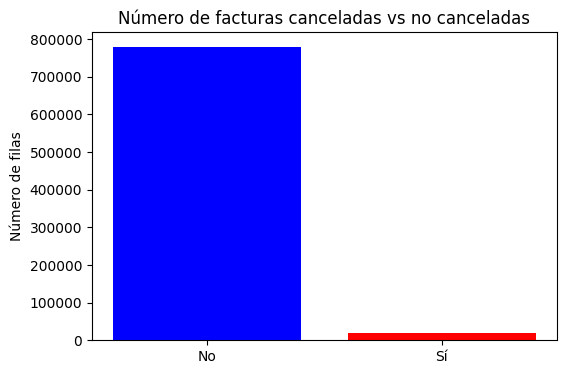

In [ ]:
count_canceladas = onlineRetail['InvoiceNo'].str.startswith('C', na=False).value_counts()
plt.figure(figsize=(6,4))
plt.bar(['No', 'Sí'], [count_canceladas[False], count_canceladas[True]], color=['blue', 'red'])
plt.ylabel('Número de filas')
plt.title('Número de facturas canceladas vs no canceladas')
plt.show()

Ejecutamos:

In [ ]:
initial_rows = onlineRetail.shape[0]
onlineRetail = onlineRetail[~onlineRetail['InvoiceNo'].str.startswith('C', na=False)]
rows_after_filtering = onlineRetail.shape[0]
rows_removed = initial_rows - rows_after_filtering
print(f"Se eliminaron {rows_removed} filas con InvoiceNo comenzando con 'C'.")

Se eliminaron 18390 filas con InvoiceNo comenzando con 'C'.


Verificamos:

In [ ]:
initial_rows = onlineRetail.shape[0]
rows_to_remove = onlineRetail['InvoiceNo'].str.startswith('C', na=False).sum()
if rows_to_remove == 0:
    print("No hay facturas canceladas (InvoiceNo comenzando con 'C').")
else:
    onlineRetail = onlineRetail[~onlineRetail['InvoiceNo'].str.startswith('C', na=False)]
    rows_after_filtering = onlineRetail.shape[0]
    rows_removed = initial_rows - rows_after_filtering
    print(f"Se eliminaron {rows_removed} filas con InvoiceNo comenzando con 'C'.")

No hay facturas canceladas (InvoiceNo comenzando con 'C').


### Valores inconsistentes

#### Evaluando si existen cantidades o precios inconsistentes

- Puede existir un Quantity (Cantidad) negativa o nula, por ejemplo: -9, 0, -1, etc.
- Puede existir un UnitPrice (Precio Unitario) negativo o nulo, por ejemplo: -8.1, 0, -1.3, etc.

In [ ]:
def mostrarCantidadNegativa(dataFrame):
  return dataFrame[dataFrame["Quantity"] <= 0]["Quantity"]

def mostrarPrecioUnitarioNegativo(dataFrame):
  return dataFrame[dataFrame["UnitPrice"] <= 0]["UnitPrice"]

Ejecutamos:

In [ ]:
mostrarCantidadNegativa(onlineRetail)

,Quantity


Ejecutamos:

In [ ]:
mostrarPrecioUnitarioNegativo(onlineRetail)

,UnitPrice
4674,0.0
6781,0.0
16107,0.0
18738,0.0
18739,0.0
...,...
1004540,0.0
1005014,0.0
1006110,0.0
1011446,0.0


Graficamos:

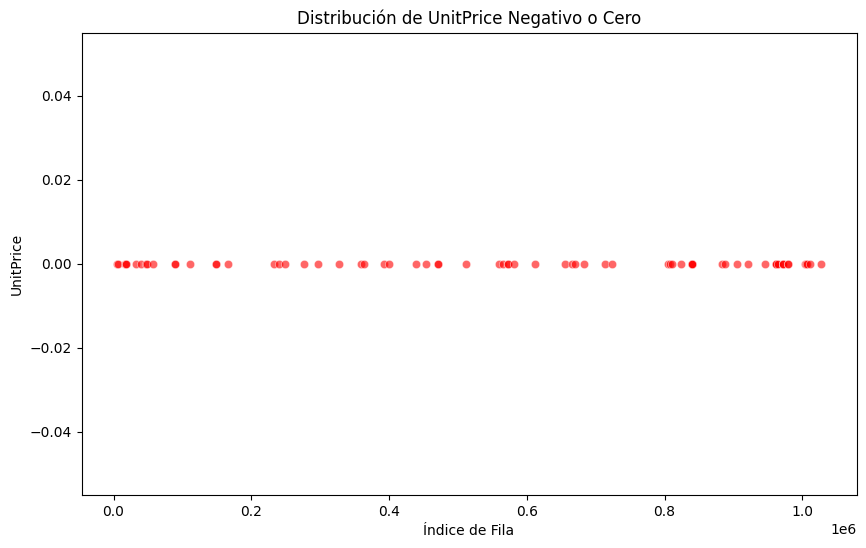

In [ ]:
neg_unit_price = onlineRetail[onlineRetail["UnitPrice"] <= 0]

if not neg_unit_price.empty:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=neg_unit_price.index, y=neg_unit_price['UnitPrice'], color='red', alpha=0.6)
    plt.title('Distribución de UnitPrice Negativo o Cero')
    plt.xlabel('Índice de Fila')
    plt.ylabel('UnitPrice')
    plt.show()
else:
    print("No hay valores de UnitPrice negativos o cero.")

Extraemos el máximo y minímo de la cantidad y precio unitario (con outlaiers)

In [ ]:
min_quantity = onlineRetail['Quantity'].min()
max_quantity = onlineRetail['Quantity'].max()
min_unit_price = onlineRetail['UnitPrice'].min()
max_unit_price = onlineRetail['UnitPrice'].max()

print(f"Valor mínimo de Quantity: {min_quantity}")
print(f"Valor máximo de Quantity: {max_quantity}")
print(f"Valor mínimo de UnitPrice: {min_unit_price}")
print(f"Valor máximo de UnitPrice: {max_unit_price}")

Valor mínimo de Quantity: 1
Valor máximo de Quantity: 80995
Valor mínimo de UnitPrice: 0.0
Valor máximo de UnitPrice: 10953.5


Eliminamos las filas que contengan un precio unitario y cantidad no válido:

In [ ]:
onlineRetail.query("Quantity > 0 and UnitPrice > 0", inplace=True)

Verificamos:

In [ ]:
mostrarCantidadNegativa(onlineRetail)

,Quantity


In [ ]:
mostrarPrecioUnitarioNegativo(onlineRetail)

,UnitPrice


Verificamos el gráfico:

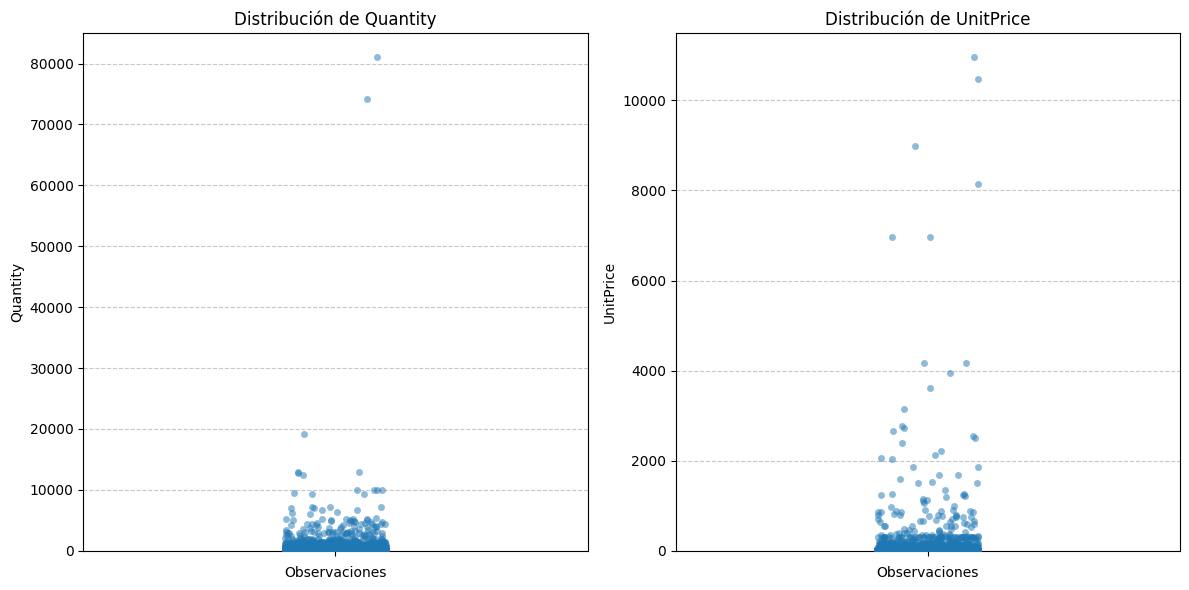

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.stripplot(y=onlineRetail['Quantity'], alpha=0.5)
plt.title('Distribución de Quantity')
plt.ylabel('Quantity')
plt.xlabel('Observaciones')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(bottom=0)

plt.subplot(1, 2, 2)
sns.stripplot(y=onlineRetail['UnitPrice'], alpha=0.5)
plt.title('Distribución de UnitPrice')
plt.ylabel('UnitPrice')
plt.xlabel('Observaciones')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Verificamos los nuevos mínimos y maximos:

In [ ]:
min_quantity = onlineRetail['Quantity'].min()
max_quantity = onlineRetail['Quantity'].max()
min_unit_price = onlineRetail['UnitPrice'].min()
max_unit_price = onlineRetail['UnitPrice'].max()

print(f"Valor mínimo de Quantity: {min_quantity}")
print(f"Valor máximo de Quantity: {max_quantity}")
print(f"Valor mínimo de UnitPrice: {min_unit_price}")
print(f"Valor máximo de UnitPrice: {max_unit_price}")

Valor mínimo de Quantity: 1
Valor máximo de Quantity: 80995
Valor mínimo de UnitPrice: 0.001
Valor máximo de UnitPrice: 10953.5


#### Evaluando si pueden existir fechas inconsistentes

In [ ]:
fechaMinima = onlineRetail['InvoiceDate'].min()
fechaMaxima = onlineRetail['InvoiceDate'].max()

print(f"Fecha mínima de InvoiceDate: {fechaMinima}")
print(f"Fecha máxima de InvoiceDate: {fechaMaxima}")

fechasInvalidas = pd.to_datetime(onlineRetail['InvoiceDate'], errors='coerce').isnull().sum()

if fechasInvalidas > 0:
    print(f"\nSe encontraron {fechasInvalidas} fechas inválidas en la columna InvoiceDate.")
else:
    print("\nNo se encontraron fechas inválidas en la columna InvoiceDate.")

Fecha mínima de InvoiceDate: 2009-12-01 07:45:00
Fecha máxima de InvoiceDate: 2011-12-09 12:50:00

No se encontraron fechas inválidas en la columna InvoiceDate.


#### Verificar si existen paises inconsistentes

Usamos GeoPandas  

In [ ]:
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_countries.zip")

Validamos paises que esten dentro de zip

In [ ]:
def ValidarPais(pais, world):
    paises_validos = set(world['ADMIN'].unique())
    return pais in paises_validos

Analizamos los paises del dataset

In [ ]:
def AnalizarPaises(df, world, columnaPais="Country"):
    paises_validos = set(world['ADMIN'].unique())
    invalidos = df.loc[~df[columnaPais].isin(paises_validos), columnaPais]
    invalidos_contados = invalidos.value_counts().to_dict()
    return invalidos_contados

Obtenemos los paises no reconocidos

In [ ]:
PaisesNoReconocidos = AnalizarPaises(onlineRetail, world)
if not PaisesNoReconocidos:
    print("No se encontraron países no reconocidos.")
else:
    for pais, contador in PaisesNoReconocidos.items():
        print(f'{pais}: {contador}')

EIRE: 15565
Channel Islands: 1551
Unspecified: 518
USA: 409
RSA: 122
European Community: 60
West Indies: 54
Korea: 53
Czech Republic: 25


EIRE (7890) → Es Irlanda (se usaba “Eire” antiguamente para referirse al país en inglés). Se puede considerar válido, solo que el nombre está en un formato distinto.

Channel Islands (748) → Son las Islas del Canal (Jersey, Guernsey…), dependencias de la Corona británica, no un país independiente.

Unspecified (446) → Registros donde el país no fue indicado → se suelen eliminar porque no aportan información.

USA (179) → Pocos pedidos desde Estados Unidos → válido, aunque marginal.

European Community (60) → Un valor genérico, no un país → se suelen eliminar porque no aportan información.

RSA (57) → Es República de Sudáfrica (Republic of South Africa).

Czech Republic (25) → Válido, aunque con muy pocos registros.

Korea (54) → se debe normalizar a South Korea.

West Indies (54) → Registros donde el país no fue indicado → se suelen eliminar porque no aportan información.

Normalizamos los paises

In [ ]:
def normalizarPaises(dataFrame, columnaPais):
    mapeoPaises = {
        'EIRE': 'Ireland',
        'Channel Islands': 'United Kingdom',
        'Unspecified': "Others",
        'USA': 'United States of America',
        'European Community': "Others",
        'West Indies': "Others",
        'RSA': 'South Africa',
        'Czech Republic': 'Czechia',
        'Korea': 'South Korea'
    }
    dataFrame[columnaPais] = dataFrame[columnaPais].replace(mapeoPaises)

Ejecutamos

In [ ]:
normalizarPaises(onlineRetail, 'Country')

Eliminamos los registros "Others", dado que no tienen un paies de referencia.

In [ ]:
onlineRetail.drop(onlineRetail[onlineRetail['Country'] == 'Others'].index, inplace=True)

Verificamos:

In [ ]:
PaisesNoReconocidos = AnalizarPaises(onlineRetail, world)
if not PaisesNoReconocidos:
    print("No se encontraron países no reconocidos.")
else:
    for pais, contador in PaisesNoReconocidos.items():
        print(f'{pais}: {contador}')

No se encontraron países no reconocidos.


Obtenemos la cantidad de paises involucrados en el dataset

In [ ]:
num_paises = onlineRetail['Country'].nunique()
print(f"Número de países únicos en el DataFrame: {num_paises}")

Número de países únicos en el DataFrame: 37


## Outliers

### ¿Entre que rangos estan los datos?

In [ ]:
def visualizar_minmax_box(df, columna):
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[columna], color="lightblue")
    plt.title(f"Valores extremos de {columna}")
    plt.show()
    print(f"Valor mínimo de {columna}: {df[columna].min()}")
    print(f"Valor máximo de {columna}: {df[columna].max()}")

In [ ]:
def visualizar_minmax_hist(df, columna):
    plt.figure(figsize=(8,5))
    sns.histplot(df[columna], bins=50, color="skyblue")
    plt.axvline(df[columna].min(), color='red', linestyle='--', label=f"Min: {df[columna].min()}")
    plt.axvline(df[columna].max(), color='green', linestyle='--', label=f"Max: {df[columna].max()}")
    plt.title(f"Distribución de {columna}")
    plt.legend()
    plt.show()
    print(f"Valor mínimo de {columna}: {df[columna].min()}")
    print(f"Valor máximo de {columna}: {df[columna].max()}")

Podemos analizar entre que rangos estan los valores de la cantidad de un producto



Ejecutamos:

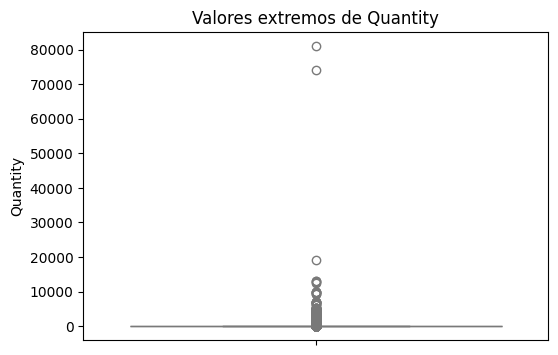

Valor mínimo de Quantity: 1
Valor máximo de Quantity: 80995


In [ ]:
visualizar_minmax_box(onlineRetail, "Quantity")

Podemos analizar entre que rangos estan los valores de la cantidad del precio unitario de un producto

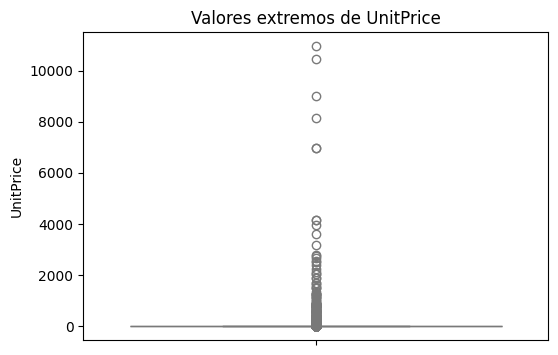

Valor mínimo de UnitPrice: 0.001
Valor máximo de UnitPrice: 10953.5


In [ ]:
visualizar_minmax_box(onlineRetail, "UnitPrice")

Podemos analizar entre que rangos estan los valores de la cantidad del precio unitario del código de un cliente

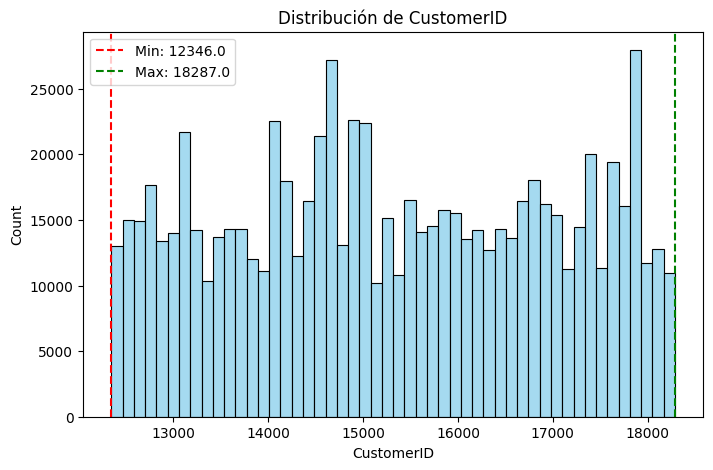

Valor mínimo de CustomerID: 12346.0
Valor máximo de CustomerID: 18287.0


In [ ]:
visualizar_minmax_hist(onlineRetail, "CustomerID")

Podemos analizar entre que rangos estan los valores de la fecha de una factura

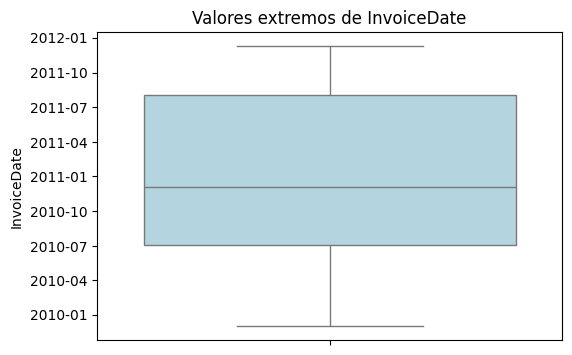

Valor mínimo de InvoiceDate: 2009-12-01 07:45:00
Valor máximo de InvoiceDate: 2011-12-09 12:50:00


In [ ]:
onlineRetail['InvoiceDate'] = pd.to_datetime(onlineRetail['InvoiceDate'])
visualizar_minmax_box(onlineRetail, "InvoiceDate")

Podemos analizar los paises involucrados en el dataset

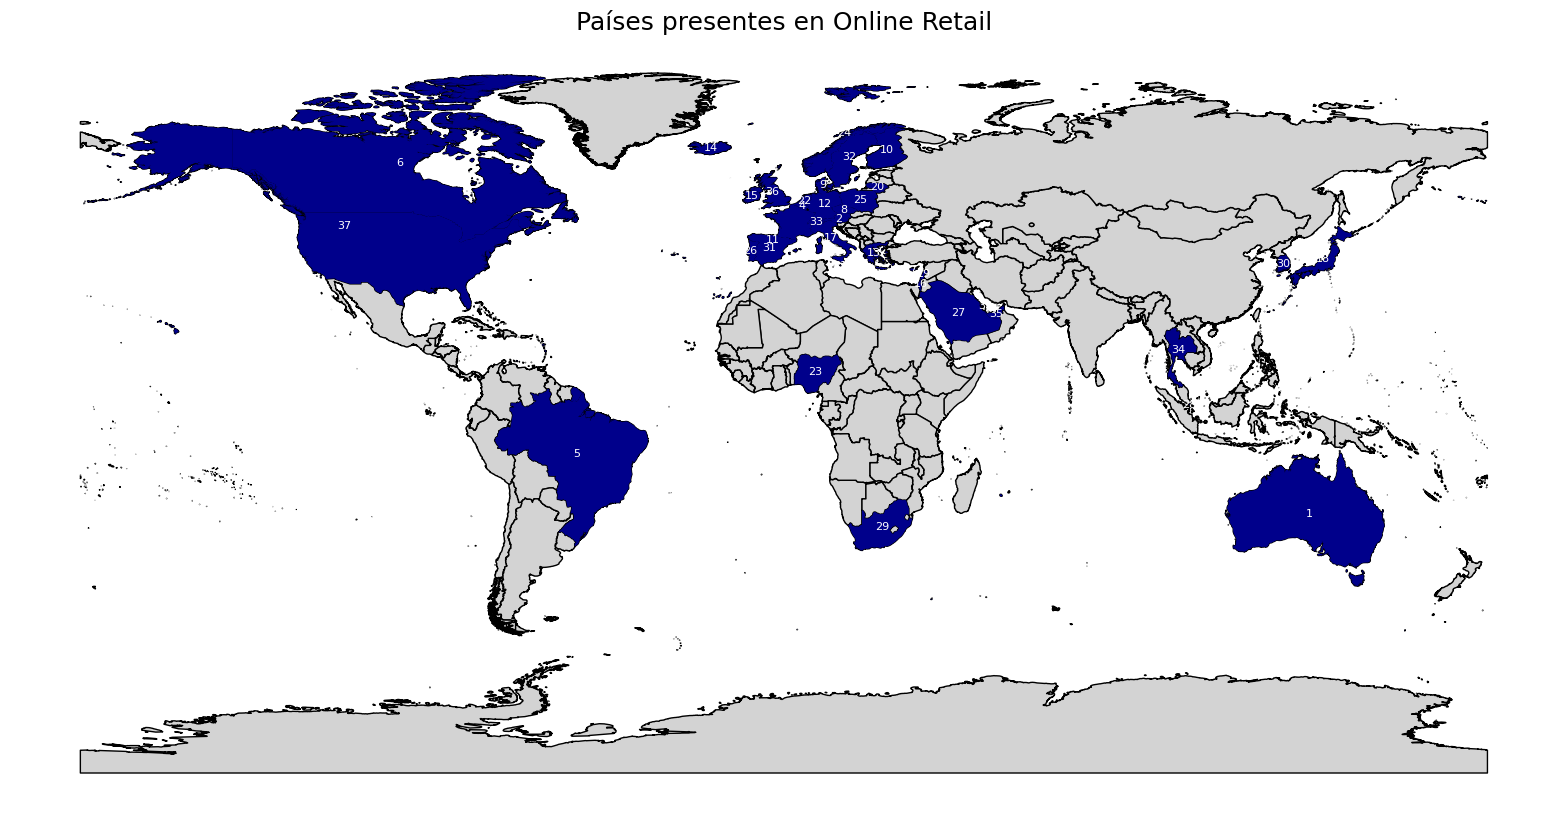

In [ ]:
countries = onlineRetail['Country'].unique()
world["present"] = world["ADMIN"].isin(countries)
world_present = world[world["present"]].copy()
world_present = world_present.sort_values("ADMIN").reset_index(drop=True)
world_present['label'] = range(1, len(world_present) + 1)
fig, ax = plt.subplots(figsize=(20, 10))
world.plot(ax=ax, color="lightgray", edgecolor="black")
world_present.plot(ax=ax, color="darkblue")
for index, row in world_present.iterrows():
    centroid = row.geometry.centroid
    ax.annotate(
        text=int(row['label']),
        xy=(centroid.x, centroid.y),
        ha='center', va='center',
        fontsize=8, color='white'
    )

plt.title("Países presentes en Online Retail", fontsize=18)
plt.axis("off")
plt.show()

# Mostrar asignación en consola (alfabética)
#print("\nAsignación de números a países (orden alfabético):")
#for index, row in world_present.iterrows():
#    print(f"{int(row['label'])}: {row['ADMIN']}")

#Verificar faltantes (si es que aún hay)
#world_countries_list = world['ADMIN'].unique().tolist()
#countries_not_in_world = [c for c in countries if c not in world_countries_list]
#print(f"\nPaíses en onlineRetail no encontrados en el mapa mundial GeoDataFrame: {countries_not_in_world}")

### Análisis describe

In [ ]:
onlineRetail[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,778793.000000,778793.000000
mean,13.492603,3.218415
std,145.914650,29.688027
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,10953.500000


### Análisis de outlaiers

Analizamos los outliers a nivel de cantidad

In [ ]:
onlineRetail_for_plotting = onlineRetail.copy()

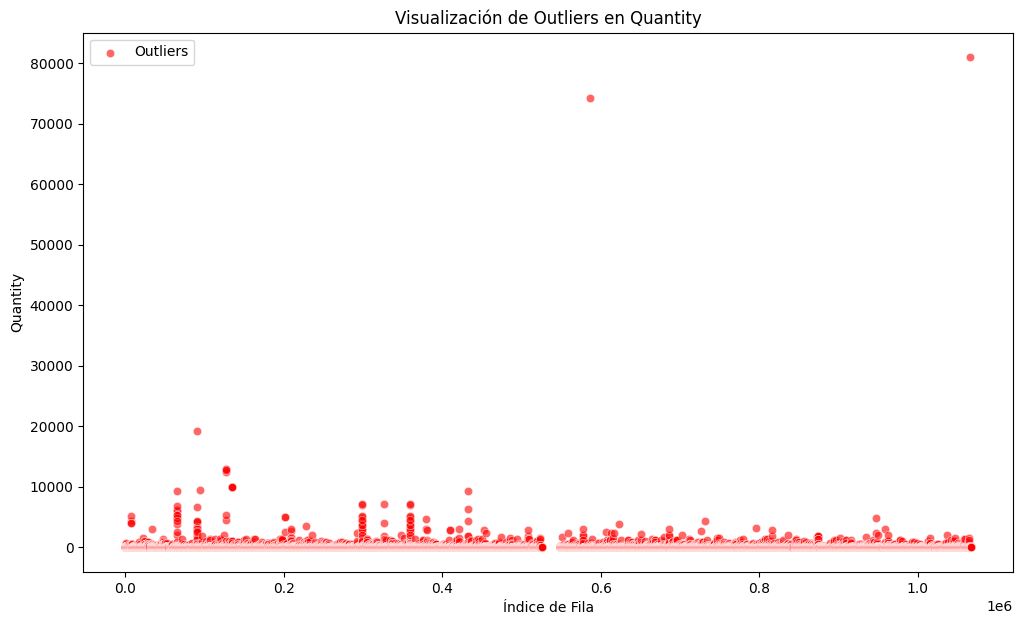

In [ ]:
if 'onlineRetail_for_plotting' not in locals() and 'onlineRetail' in locals():
    onlineRetail_for_plotting = pd.read_csv(rutaArchivo, encoding='ISO-8859-1')
    onlineRetail_for_plotting.dropna(inplace=True)
    onlineRetail_for_plotting.query("Quantity > 0 and UnitPrice > 0", inplace=True)
# Calcular outliers en Quantity
Q1_q = onlineRetail_for_plotting['Quantity'].quantile(0.25)
Q3_q = onlineRetail_for_plotting['Quantity'].quantile(0.75)
IQR_q = Q3_q - Q1_q
lower_bound_q = Q1_q - 1.5 * IQR_q
upper_bound_q = Q3_q + 1.5 * IQR_q
outliers_q = onlineRetail_for_plotting[(onlineRetail_for_plotting['Quantity'] < lower_bound_q) |
                                       (onlineRetail_for_plotting['Quantity'] > upper_bound_q)]
plt.figure(figsize=(12, 7))
sns.scatterplot(x=outliers_q.index, y=outliers_q['Quantity'], color='red', label='Outliers', alpha=0.6)
plt.title('Visualización de Outliers en Quantity')
plt.xlabel('Índice de Fila')
plt.ylabel('Quantity')
plt.legend()
plt.show()

Analizamos los outliers a nivel de precio unitario

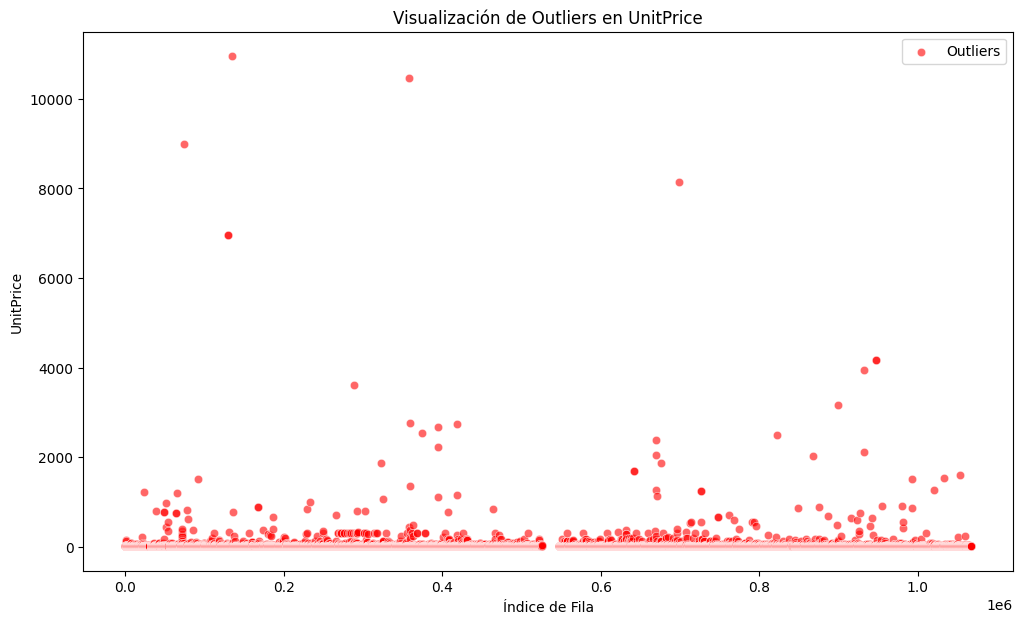

In [ ]:
if 'onlineRetail_for_plotting' not in locals() and 'onlineRetail' in locals():
    onlineRetail_for_plotting = pd.read_csv(rutaArchivo, encoding='ISO-8859-1')
    onlineRetail_for_plotting.dropna(inplace=True)
    onlineRetail_for_plotting.query("Quantity > 0 and UnitPrice > 0", inplace=True)
Q1_p = onlineRetail_for_plotting['UnitPrice'].quantile(0.25)
Q3_p = onlineRetail_for_plotting['UnitPrice'].quantile(0.75)
IQR_p = Q3_p - Q1_p
lower_bound_p = Q1_p - 1.5 * IQR_p
upper_bound_p = Q3_p + 1.5 * IQR_p
outliers_p = onlineRetail_for_plotting[(onlineRetail_for_plotting['UnitPrice'] < lower_bound_p) |
                                       (onlineRetail_for_plotting['UnitPrice'] > upper_bound_p)]
plt.figure(figsize=(12, 7))
sns.scatterplot(x=outliers_p.index, y=outliers_p['UnitPrice'], color='red', label='Outliers', alpha=0.6)
plt.title('Visualización de Outliers en UnitPrice')
plt.xlabel('Índice de Fila')
plt.ylabel('UnitPrice')
plt.legend()
plt.show()

Analizamos los valores normales a nivel de cantidad

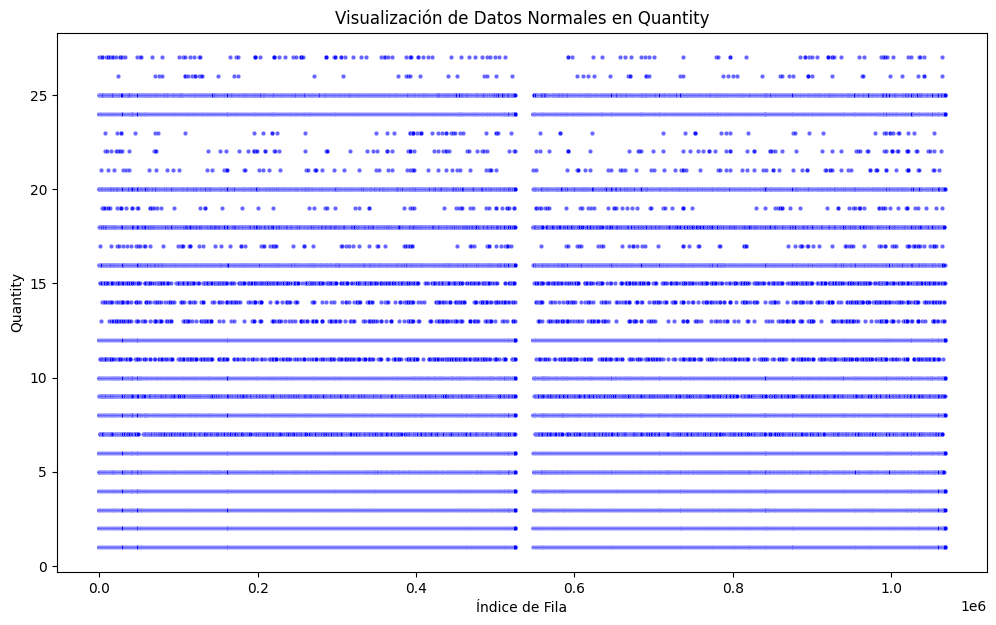

In [ ]:
Q1_q = onlineRetail_for_plotting['Quantity'].quantile(0.25)
Q3_q = onlineRetail_for_plotting['Quantity'].quantile(0.75)
IQR_q = Q3_q - Q1_q
lower_bound_q = Q1_q - 1.5 * IQR_q
upper_bound_q = Q3_q + 1.5 * IQR_q
normal_q = onlineRetail_for_plotting[(onlineRetail_for_plotting['Quantity'] >= lower_bound_q) &
                                     (onlineRetail_for_plotting['Quantity'] <= upper_bound_q)]
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x=normal_q.index, y=normal_q['Quantity'],
    alpha=0.6, color='blue', s=10, legend=False
)
plt.title('Visualización de Datos Normales en Quantity')
plt.xlabel('Índice de Fila')
plt.ylabel('Quantity')
plt.show()

Analizamos los valores normales a nivel de precio unitario

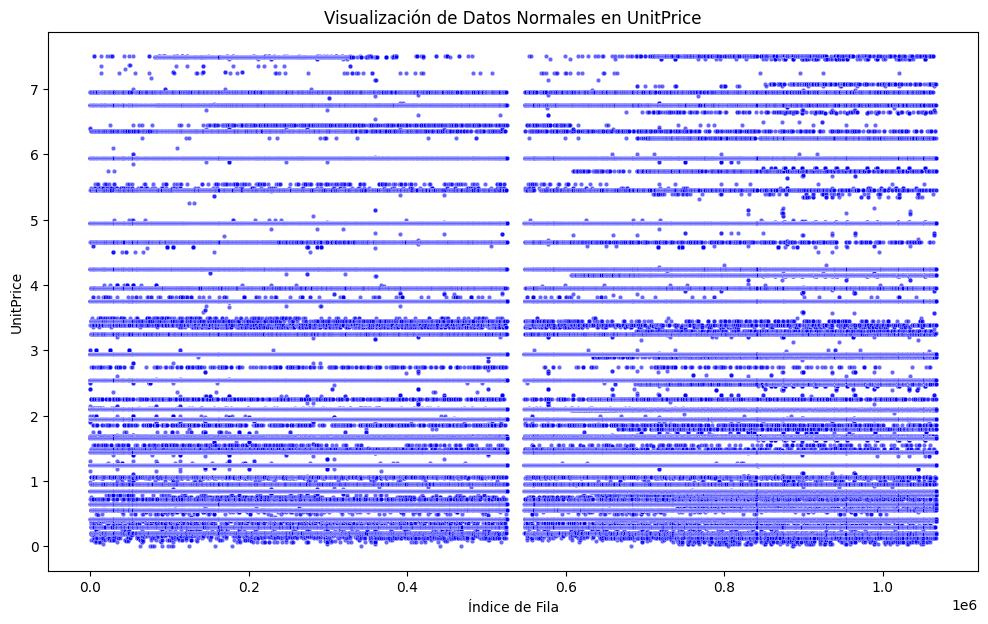

In [ ]:
Q1_p = onlineRetail_for_plotting['UnitPrice'].quantile(0.25)
Q3_p = onlineRetail_for_plotting['UnitPrice'].quantile(0.75)
IQR_p = Q3_p - Q1_p
lower_bound_p = Q1_p - 1.5 * IQR_p
upper_bound_p = Q3_p + 1.5 * IQR_p
normal_p = onlineRetail_for_plotting[(onlineRetail_for_plotting['UnitPrice'] >= lower_bound_p) &
                                     (onlineRetail_for_plotting['UnitPrice'] <= upper_bound_p)]
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x=normal_p.index, y=normal_p['UnitPrice'],
    alpha=0.6, color='blue', s=10, legend=False  # leyenda desactivada
)
plt.title('Visualización de Datos Normales en UnitPrice')
plt.xlabel('Índice de Fila')
plt.ylabel('UnitPrice')
plt.show()

### Outlaiers según (Chen, Sain & Guo, 2012)

#### Limitaciones identificadas

En el análisis de segmentación de clientes con el modelo RFM, los autores utilizan el método **IQR (Interquartile Range)** para la detección y eliminación de valores atípicos (outliers).  
Si bien este procedimiento es estándar en estadística, se identifican algunas limitaciones que vale la pena señalar:

1. **Falta de justificación frente a otros métodos**  
   El paper no explica por qué se seleccionó específicamente el método IQR en lugar de otros enfoques posibles, como el método Z-score, técnicas de Winsorización o incluso algoritmos basados en machine learning (Isolation Forest, DBSCAN, etc.).  
   Esto limita la claridad sobre la robustez de la elección metodológica.

2. **Ausencia de consideraciones de negocio**  
   En el contexto del retail online, no todos los valores extremos deben eliminarse automáticamente.  
   Por ejemplo:
   - Una compra con cantidades excepcionalmente altas podría corresponder a un cliente mayorista o corporativo.  
   - Precios unitarios elevados podrían estar asociados a productos de lujo o segmentos VIP.  
   El paper no aborda este punto, y al aplicar el IQR de manera automática existe el riesgo de eliminar información de alto valor estratégico.

3. **No se realiza comparación con otros métodos de outliers**  
   Los autores no comparan los resultados del IQR con otros enfoques de detección de outliers. Una comparación habría permitido evaluar:
   - Cómo varían los segmentos de clientes según el método de limpieza elegido.  
   - Si los valores atípicos realmente eran ruido o si representaban patrones de negocio relevantes.

Función del paper 3

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    fence_low = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

Probamos la normalización

In [ ]:
columnas_numericas = ['Quantity', 'UnitPrice']
df_clean = onlineRetail.copy()

for columna in columnas_numericas:
    df_clean = remove_outlier(df_clean, columna)
    print(f"Outliers eliminados de {columna}")

Outliers eliminados de Quantity
Outliers eliminados de UnitPrice


Verificar que no existan nulos en el nuevo dataset de prueba

In [ ]:
verificarNulos(df_clean)

,Columna,NumeroDeValoresNulos
0,InvoiceNo,0
1,StockCode,0
2,Description,0
3,Quantity,0
4,InvoiceDate,0
5,UnitPrice,0
6,CustomerID,0
7,Country,0


Verificar que no existan filas duplicadas en el nuevo dataset de prueba

In [ ]:
mostrarDuplicados(df_clean)

Cantidad de filas duplicadas: 0


Probamos

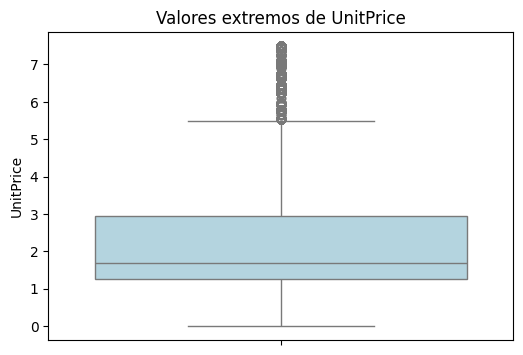

Valor mínimo de UnitPrice: 0.001
Valor máximo de UnitPrice: 7.49


In [ ]:
visualizar_minmax_box(df_clean, "UnitPrice")

Probamos

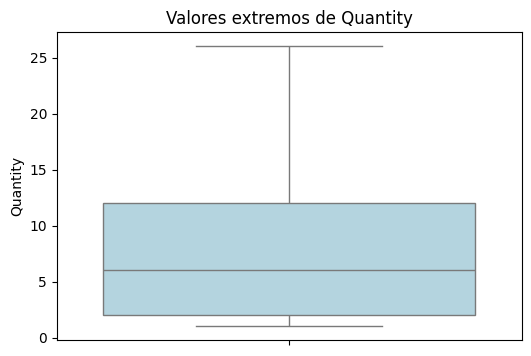

Valor mínimo de Quantity: 1
Valor máximo de Quantity: 26


In [ ]:
visualizar_minmax_box(df_clean, "Quantity")

En conclusión, siguiendo la perspectiva de Khandelwal (2021), en el contexto del retail online no es adecuado eliminar de manera automática todos los valores atípicos, ya que muchos de ellos no son simples errores estadísticos sino indicadores de clientes mayoristas, segmentos VIP o productos de lujo. Por ello, más que aplicar un filtrado mecánico, es fundamental analizar los outliers en función de su valor de negocio, pues conservarlos permite descubrir patrones de consumo diferenciados y diseñar estrategias de marketing más precisas.


## Guardado del dataset

Guardamos el dataset limpio (usar solo cuando se esta en google colab)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
output_dir = os.path.dirname(rutaArchivo)
output_file = os.path.join(output_dir, "onlineRetail_cleaned.csv")
onlineRetail.to_csv(output_file, index=False)
print(f"DataFrame Online Retail guardado exitosamente en: {output_file}")

DataFrame Online Retail guardado exitosamente en: /content/drive/MyDrive/datasets/online retail/csv/onlineRetail_cleaned.csv


In [ ]:
onlineRetail2 = pd.read_csv("/content/drive/MyDrive/datasets/online retail/csv/online_retail_II_cleaned.csv", encoding='ISO-8859-1')

In [ ]:
onlineRetail2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
verificarNulos(onlineRetail2)

,Columna,NumeroDeValoresNulos
0,InvoiceNo,0
1,StockCode,0
2,Description,0
3,Quantity,0
4,InvoiceDate,0
5,UnitPrice,0
6,CustomerID,0
7,Country,0


In [ ]:
mostrarDuplicados(onlineRetail2)

Cantidad de filas duplicadas: 0


In [ ]:
mostrarCantidadNegativa(onlineRetail2)

,Quantity


In [ ]:
mostrarPrecioUnitarioNegativo(onlineRetail2)

,UnitPrice


In [ ]:
initial_rows = onlineRetail2.shape[0]
onlineRetail2['InvoiceNo'] = onlineRetail2['InvoiceNo'].astype(str)
rows_to_remove = onlineRetail2['InvoiceNo'].str.startswith('C', na=False).sum()
if rows_to_remove == 0:
    print("No hay facturas canceladas (InvoiceNo comenzando con 'C').")
else:
    onlineRetail2 = onlineRetail2[~onlineRetail2['InvoiceNo'].str.startswith('C', na=False)]
    rows_after_filtering = onlineRetail2.shape[0]
    rows_removed = initial_rows - rows_after_filtering
    print(f"Se eliminaron {rows_removed} filas con InvoiceNo comenzando con 'C'.")

No hay facturas canceladas (InvoiceNo comenzando con 'C').


In [ ]:
onlineRetail2.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


## Conclusiones del Análisis de Limpieza de Datos

Después de realizar una exploración inicial y limpieza de los datos del dataset "Online Retail", se identificaron y trataron varios problemas:

*   **Datos Duplicados:** Se encontraron y eliminaron 34335 filas duplicadas.
*   **Valores Faltantes:** Las columnas `Description` y `CustomerID` presentaban valores nulos. Se decidió eliminar las filas con `CustomerID` nulo, ya que sin esta información no es posible identificar a los clientes para análisis posteriores como la segmentación RFM. Esto resultó en la eliminación de 235151 filas.
*   **Datos Inconsistentes:**
    *   Se identificaron transacciones con `InvoiceNo` que comenzaban con 'C', indicando cancelaciones. Estas filas (18390 en total) fueron eliminadas ya que representan transacciones no completadas.
    *   Se verificaron valores negativos o cero en `Quantity` y `UnitPrice`. Todas las filas con `Quantity` menor o igual a 0 y `UnitPrice` menor o igual a 0 fueron eliminadas.
    *   Se normalizaron algunos nombres de países inconsistentes (EIRE a Ireland, RSA a South Africa, Korea a South Korea, Czech Republic a Czechia) y se eliminaron registros genéricos o no especificados (`Channel Islands`, `Unspecified`, `European Community`, `West Indies`).
*   **Outliers:** Se realizó un análisis de outliers en las columnas `Quantity` y `UnitPrice` utilizando el método del Rango Intercuartílico (IQR). Si bien este método es común para identificar valores extremos, se concluyó que **no es adecuado eliminar de manera automática todos los valores atípicos en este contexto de retail online**. Esto se debe a que muchos de estos valores atípicos pueden representar información valiosa sobre clientes mayoristas, compras de alto valor o productos de lujo, los cuales son importantes para identificar segmentos de clientes de alto valor y diseñar estrategias de marketing específicas. Por lo tanto, en lugar de una eliminación mecánica, se enfatiza la necesidad de analizar estos outliers desde una perspectiva de negocio para no perder información estratégica.

En resumen, se ha realizado un proceso de limpieza exhaustivo para asegurar que el dataset sea confiable para análisis posteriores, como la segmentación de clientes, manteniendo la consideración de que ciertos valores atípicos pueden ser relevantes desde un punto de vista de negocio.